In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

In [15]:
class COVID19(object):
    def __init__(self, df_path):
        self.df = pd.read_csv(df_path, header = 0)
        
    def data_head(self):
        print(self.df.head())
        
    def get_states(self):
        return self.df.state.unique()
    
    def plot_list(self, state_list, col_number, log_state = False):
        #define the plot row and col
        length = len(state_list)
        col = col_number
        if length % col_number < 0.01:
            row_number = length // col_number
        else:
            row_number = length // col_number + 1
        
        fig = plt.figure(figsize = (20/5 * col ,40/12*row_number))
        for num, ct in enumerate(state_list):
            sc_df = self.df[(self.df.state == ct)]
            dates = pd.to_datetime(sc_df.date)
            cases = sc_df.cases.values
            deaths = sc_df.deaths.values
           
            ax = fig.add_subplot(row_number, col, num+1)
            if log_state:
                ax.plot(dates, np.log(cases), c = "green")
                ax.plot(dates, np.log(deaths), c = "red")
            else:
                ax.plot(dates, cases, c = "green")
                ax.plot(dates, deaths, c = "red")
            plt.ylabel("people")
            plt.xticks([])
            plt.title(ct)
        #plt.xticks(rotation=90)
            plt.legend(["Cases", "Deaths"])
    def plot_all(self, state_list, log_state = False):
        
        fig = plt.figure(figsize = (8 ,5))
        ax = fig.add_subplot(1, 1, 1)
        for num, ct in enumerate(state_list):
            sc_df = self.df[(self.df.state == ct)]
            dates = pd.to_datetime(sc_df.date)
            cases = sc_df.cases.values
            deaths = sc_df.deaths.values
            if log_state:
                ax.plot(dates, np.log(cases), label = ct)
            else:
                ax.plot(dates, cases, label = ct)
        plt.ylabel("Cases")
        plt.xticks(rotation=90)
        plt.legend()
        
    def plot_state(self, state, log_state = False):
        fig = plt.figure(figsize = (8 ,5))
        ax = fig.add_subplot(1, 1, 1)
        sc_df = self.df[(self.df.state == state)]
        dates = pd.to_datetime(sc_df.date)
        cases = sc_df.cases.values
        deaths = sc_df.deaths.values
        if log_state:
            ax.plot(dates, np.log(cases), label=state)
        else:
            ax.plot(dates, cases, label=state)
            
        plt.ylabel("Cases")
        plt.xticks(rotation=90)
        plt.legend()

In [3]:
# Check the files
files = glob('*.csv')
print(files)

['us-counties.csv', 'time_series_covid19_confirmed_global.csv', 'us-states.csv']


In [4]:
df = pd.read_csv(files[2])
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [16]:
us_all = COVID19(files[2])

In [6]:
us_all.get_states()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

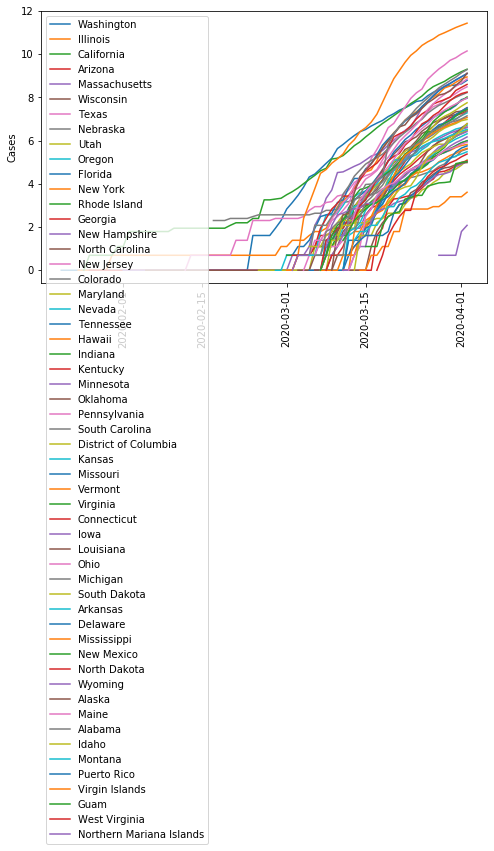

In [17]:
us_all.plot_all(us_all.get_states(), True)

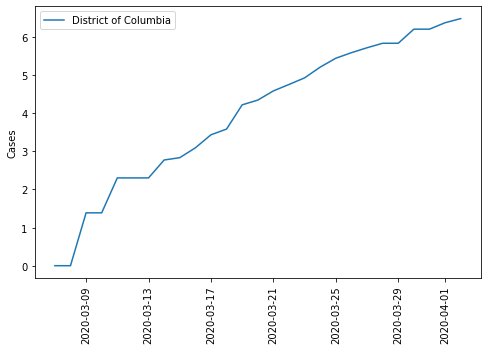

In [19]:
us_all.plot_state('District of Columbia', log_state = True)